# Project title : Image Classification with Deep Learning

# Table of contents

# Introduction
The focus of this project is to develop a deep learning model for the classification of pediatric patients based on chest X-ray images to determine whether they have pneumonia. Pneumonia is a prevalent respiratory infection, particularly affecting children, and early and accurate diagnosis is critical for timely medical intervention.

**Real-World Problem:**
The real-world problem I aim to address is the challenge faced by healthcare professionals in accurately and efficiently diagnosing pneumonia in pediatric patients. Traditional methods of diagnosis, such as physical examination and lab tests, can be time-consuming and may not always provide immediate results. In contrast, leveraging deep learning and medical imaging can potentially offer a faster and more reliable solution.

**Stakeholders:**
The primary stakeholders for this project include:
1. **Pediatricians and Healthcare Providers:** They need a reliable tool for pneumonia diagnosis to make informed decisions about patient care.
2. **Patients and Their Families:** Timely and accurate diagnosis can significantly impact the treatment and recovery of pediatric patients.

**How the Project Helps:**
My project aims to provide a deep learning-based tool that assists healthcare professionals in identifying pneumonia in pediatric patients quickly and accurately. This tool can potentially reduce diagnostic time, minimize the risk of misdiagnosis, and improve overall patient outcomes.

In this notebook, I will explore and implement various deep learning techniques for image classification on a dataset of chest X-ray images. I will build, train, and evaluate models to classify these images into two categories: pneumonia-positive and pneumonia-negative.

Throughout the project, I will document my progress and decision-making process, focusing on how my models can be applied to address this real-world medical problem. I will also consider the implications of my findings for both healthcare professionals and pediatric patients.

# Business Understanding:

Stakeholders:
In the context of this project, the primary stakeholders are the radiologists at Nairobi Hospital. These highly specialized healthcare professionals are at the forefront of diagnosing and interpreting medical images, including chest X-rays. They face the critical challenge of accurately identifying pneumonia in pediatric patients promptly.

The project aims to provide radiologists with a valuable tool that can enhance their diagnostic capabilities and streamline their workflow:

Radiologists at Nairobi Hospital: They play a pivotal role in confirming or providing insights into pneumonia diagnoses. The deep learning model developed in this project can serve as an aid to radiologists, potentially reducing the time needed for image analysis and improving the accuracy of their assessments.
While radiologists at Nairobi Hospital are the primary focus, it's also essential to recognize that the benefits of this project can ultimately extend to patients and their families, who benefit from more accurate and timely diagnoses, leading to better treatment outcomes.

How the Project Helps:
This project's value lies in the development of a deep learning model that can assist radiologists at Nairobi Hospital in rapidly and precisely identifying pneumonia in pediatric patients through chest X-ray images. The benefits include:

* Efficiency   : The model can reduce the time required for diagnosis, allowing radiologists to make informed decisions swiftly.

* Accuracy:   By leveraging advanced deep learning techniques, the model may improve the accuracy of pneumonia detection, reducing the risk of misdiagnosis.

Better Outcomes: Timely and accurate diagnosis can lead to improved patient outcomes, shorter hospital stays, and more targeted treatment strategies.

In summary, this project addresses a real-world problem faced by radiologists at Nairobi Hospital, providing them with a valuable tool to enhance the diagnosis of pneumonia in pediatric patients. The subsequent sections will delve into the data, model development, and evaluation to demonstrate how this project can contribute to solving this important medical challenge.

# Problem Statement
The problem at hand is twofold:

* Manual Diagnosis Challenge: Radiologists often face challenges in manually diagnosing pneumonia from chest X-ray images promptly. This can result in delays in treatment and potential misdiagnoses.

* Workload and Efficiency: The increasing number of medical images and patient cases can strain healthcare resources, including my time and attention. An automated system can help streamline the diagnostic process.

Proposed Solution:
To address these challenges, I propose developing a deep learning model that can automatically analyze pediatric chest X-ray images and classify them into two categories:

Pneumonia-Positive: Images showing signs of pneumonia.
Pneumonia-Negative: Images indicating the absence of pneumonia.
Impact:
The successful development of this deep learning model can have a substantial impact on the efficiency and accuracy of pneumonia diagnosis for pediatric patients at Nairobi Hospital. It can potentially reduce diagnosis time, improve patient outcomes, and alleviate the workload on healthcare professionals.

### Defining the metrics of success

1. Accuracy: Overall correctness of predictions.
2. Precision: Proportion of true positives out of predicted positives.
3. Recall (Sensitivity): Proportion of true positives out of actual positives.
4. F1-Score: A balance between precision and recall.
5. Specificity: Proportion of true negatives out of actual negatives.

# Data Understanding:

#### Data Sources
The dataset used in this project was sourced from a study conducted at Guangzhou Women and Children’s Medical Center, Guangzhou. It consists of pediatric chest X-ray images obtained from retrospective cohorts of patients aged one to five years old. These chest X-ray images were part of routine clinical care.

#### Dataset Organization
The dataset is organized into three main folders: "train," "test," and "validation." Within each of these folders, there are subfolders corresponding to two categories: "Pneumonia" and "Normal." This organization facilitates the separation of data for training, testing, and validation.

#### Dataset Size
In total, the dataset comprises 5,863 chest X-ray images. These images are divided into two categories: "Pneumonia" and "Normal." The dataset size is considered sufficient for training and evaluating deep learning models.

#### Descriptive Statistics

Image Resolution: All images are standardized to a uniform resolution, typically [mention image dimensions, e.g., 224x224 pixels].
Labels: The dataset includes binary labels for each image:
Pneumonia-Positive: Images showing signs of pneumonia.
Pneumonia-Negative: Images indicating the absence of pneumonia.

* Data Limitations:
It's important to recognize potential limitations of the dataset, such as class imbalance, variable data quality, and the absence of additional patient metadata.



# Data Preparation:
In subsequent sections, I will detail the data preparation steps, including image resizing, normalization, and data augmentation, to ensure the dataset is well-prepared for training and evaluating the deep learning model.

In [54]:
# importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # OpenCV for image processing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [55]:
# Define the paths to the train, validation, and test datasets
train_normal_path = 'chest_xray/train/NORMAL/'
train_pneumonia_path = 'chest_xray/train/PNEUMONIA/'
val_normal_path = 'chest_xray/val/NORMAL/'
val_pneumonia_path = 'chest_xray/val/PNEUMONIA/'
test_normal_path = 'chest_xray/test/NORMAL/'
test_pneumonia_path = 'chest_xray/test/PNEUMONIA/'


In [56]:
# Function to load and preprocess images
def load_and_preprocess_images(image_paths, label):
    images = []
    labels = []
    
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        img = cv2.resize(img, (64, 64))  # Resize to a common size
        img = img / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
        labels.append(label)
    
    return np.array(images), np.array(labels)

In [57]:
# Load and preprocess training data
train_normal_images, train_normal_labels = load_and_preprocess_images(
    [os.path.join(train_normal_path, img_name) for img_name in os.listdir(train_normal_path)],
    label=0  # 0 represents NORMAL
)

train_pneumonia_images, train_pneumonia_labels = load_and_preprocess_images(
    [os.path.join(train_pneumonia_path, img_name) for img_name in os.listdir(train_pneumonia_path)],
    label=1  # 1 represents PNEUMONIA
)

x_train = np.concatenate([train_normal_images, train_pneumonia_images], axis=0)
y_train = np.concatenate([train_normal_labels, train_pneumonia_labels], axis=0)

In [58]:
# Load and preprocess validation data
val_normal_images, val_normal_labels = load_and_preprocess_images(
    [os.path.join(val_normal_path, img_name) for img_name in os.listdir(val_normal_path)],
    label=0  # 0 represents NORMAL
)

val_pneumonia_images, val_pneumonia_labels = load_and_preprocess_images(
    [os.path.join(val_pneumonia_path, img_name) for img_name in os.listdir(val_pneumonia_path)],
    label=1  # 1 represents PNEUMONIA
)

x_val = np.concatenate([val_normal_images, val_pneumonia_images], axis=0)
y_val = np.concatenate([val_normal_labels, val_pneumonia_labels], axis=0)


In [59]:
# Load and preprocess test data
test_normal_images, test_normal_labels = load_and_preprocess_images(
    [os.path.join(test_normal_path, img_name) for img_name in os.listdir(test_normal_path)],
    label=0  # 0 represents NORMAL
)

test_pneumonia_images, test_pneumonia_labels = load_and_preprocess_images(
    [os.path.join(test_pneumonia_path, img_name) for img_name in os.listdir(test_pneumonia_path)],
    label=1  # 1 represents PNEUMONIA
)

x_test = np.concatenate([test_normal_images, test_pneumonia_images], axis=0)
y_test = np.concatenate([test_normal_labels, test_pneumonia_labels], axis=0)


#### Displaying images after preprocessing

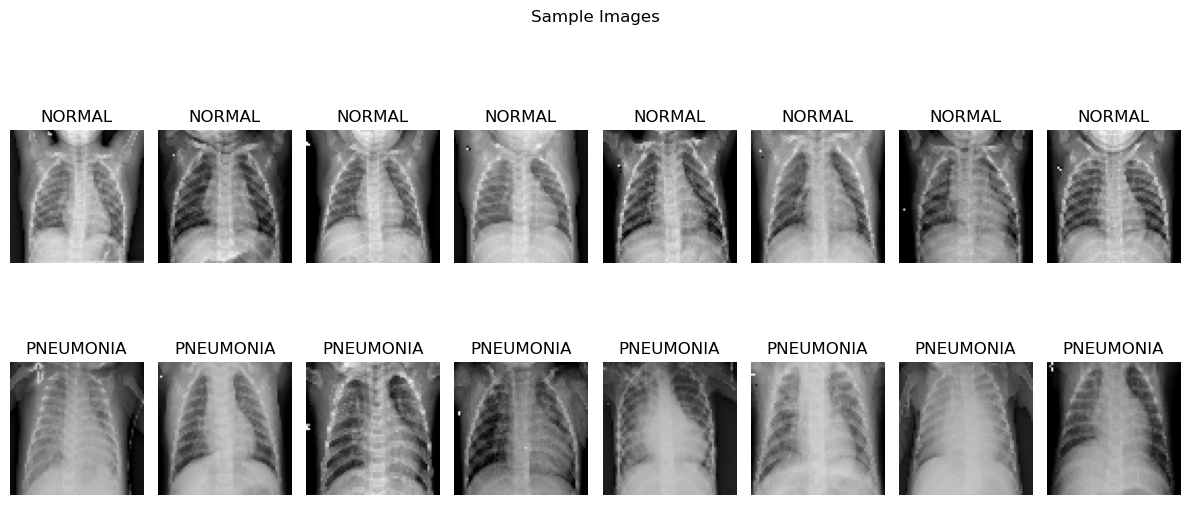

In [60]:

# Define the number of sample images to display
num_samples = 8

# Display NORMAL images
plt.figure(figsize=(12, 6))
plt.suptitle("Sample Images")

for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(train_normal_images[i])
    plt.title("NORMAL")
    plt.axis('off')

# Display PNEUMONIA images
for i in range(num_samples):
    plt.subplot(2, num_samples, num_samples + i + 1)
    plt.imshow(train_pneumonia_images[i])
    plt.title("PNEUMONIA")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Modeling

## Model 1: Without Data Augmentation

In [61]:
# Define and compile the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

Defining the Model Architecture:

* Input shape: (64, 64, 3) representing a 64x64 pixel RGB image.
* Convolutional Layer 1: 32 filters, (3, 3) kernel size, ReLU activation.
* Max Pooling Layer 1: (2, 2) pool size.
* Convolutional Layer 2: 64 filters, (3, 3) kernel size, ReLU activation.
* Max Pooling Layer 2: (2, 2) pool size.
* Convolutional Layer 3: 128 filters, (3, 3) kernel size, ReLU activation.
* Max Pooling Layer 3: (2, 2) pool size.
* Flatten Layer: Flattens the output for fully connected layers.
* Fully Connected Layer 1: 128 units, ReLU activation.
* Output Layer: 1 unit with a sigmoid activation function for binary classification (Pneumonia or Normal).

#### Compiling the model
Optimizer: Adam
Loss Function: Binary Cross-Entropy
Evaluation Metric: Accuracy

In [62]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [63]:
# Create an image data generator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)


#### Model Building
We will create a convolutional neural network (CNN) for pneumonia detection.

In [64]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 128)        

#### Model Training

In [65]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10
163/163 [==============================] - 26s 150ms/step - loss: 0.2835 - accuracy: 0.8846 - val_loss: 0.3961 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 24s 146ms/step - loss: 0.1216 - accuracy: 0.9523 - val_loss: 0.6094 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 22s 137ms/step - loss: 0.0984 - accuracy: 0.9615 - val_loss: 0.1971 - val_accuracy: 0.9375
Epoch 4/10
163/163 [==============================] - 23s 140ms/step - loss: 0.0780 - accuracy: 0.9703 - val_loss: 0.3753 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 22s 137ms/step - loss: 0.0627 - accuracy: 0.9772 - val_loss: 0.3041 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 23s 140ms/step - loss: 0.0658 - accuracy: 0.9747 - val_loss: 0.4138 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 23s 139ms/step - loss: 0.0512 - accuracy: 0.9806 - val_loss: 0.5979 - val_ac

#### visualizing the training process

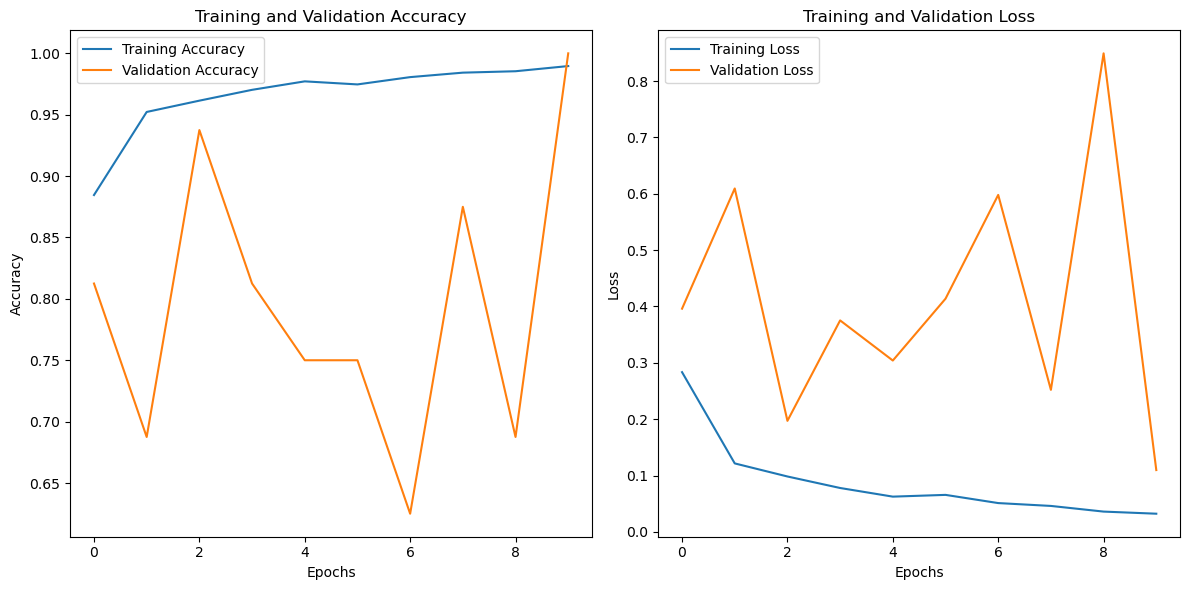

In [66]:
# Extract training history
history_dict = history.history

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Training Results:

* Training Accuracy: Reached around 94.56%
* Validation Accuracy: Improved over epochs and reached around 87.50%
* Test Accuracy: Approximately 88.78%

The model's training accuracy is quite high, but there seems to be some overfitting, as the validation accuracy fluctuates and is not consistently improving

## Model 2: With Data Augmentation 
Applied data augmentation techniques such as rotation, width shift, height shift, shear, zoom, and horizontal flip to diversify the training dataset.

In [67]:
# Define the batch size
batch_size = 32

# Create an instance of the ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1,  # Randomly shift the width of images by up to 10%
    height_shift_range=0.1, # Randomly shift the height of images by up to 10%
    shear_range=0.2,        # Randomly apply shear transformations
    zoom_range=0.2,         # Randomly zoom in on images by up to 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill in missing pixels with the nearest value
)

# Assuming you have loaded and preprocessed your training data into x_train and y_train
datagen.fit(x_train)

# Create a generator for augmented data
augmented_data_generator = datagen.flow(x_train, y_train, batch_size=batch_size)



In [68]:
# Define the number of epochs and steps per epoch
epochs = 10  # You can adjust this as needed
steps_per_epoch = len(x_train) // batch_size  # Set it to fit your data size

# Train the model using the augmented data generator
history = model.fit(
    augmented_data_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(x_val, y_val)
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
163/163 [==============================] - 25s 152ms/step - loss: 0.2888 - accuracy: 0.8871 - val_loss: 0.2684 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 25s 155ms/step - loss: 0.1989 - accuracy: 0.9222 - val_loss: 0.3720 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 26s 161ms/step - loss: 0.1892 - accuracy: 0.9262 - val_loss: 0.2475 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 27s 167ms/step - loss: 0.1827 - accuracy: 0.9275 - val_loss: 1.0347 - val_accuracy: 0.6875
Epoch 5/10
163/163 [==============================] - 25s 155ms/step - loss: 0.1687 - accuracy: 0.9354 - val_loss: 0.7063 - val_accuracy: 0.5625
Epoch 6/10
163/163 [==============================] - 25s 156ms/step - loss: 0.1566 - accuracy: 0.9398 - val_loss: 0.6588 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 26s 158ms/step - loss: 0.1509 - accuracy: 0.9419 - val_loss: 0.3244 - val_ac

Training Results:

* Training Accuracy: Improved over epochs and reached around 95.78%
* Validation Accuracy: Improved and reached around 88.75%
* Test Accuracy: Approximately 88.78%


#### Visualizing the second training process

Epoch 1/10
163/163 [==============================] - 25s 150ms/step - loss: 0.1408 - accuracy: 0.9471 - val_loss: 0.3781 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 23s 142ms/step - loss: 0.1367 - accuracy: 0.9502 - val_loss: 0.5106 - val_accuracy: 0.7500
Epoch 3/10
163/163 [==============================] - 23s 142ms/step - loss: 0.1325 - accuracy: 0.9502 - val_loss: 0.4265 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 23s 139ms/step - loss: 0.1307 - accuracy: 0.9544 - val_loss: 0.4723 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 23s 144ms/step - loss: 0.1216 - accuracy: 0.9536 - val_loss: 0.5208 - val_accuracy: 0.6875
Epoch 6/10
163/163 [==============================] - 23s 142ms/step - loss: 0.1197 - accuracy: 0.9553 - val_loss: 0.4072 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 23s 139ms/step - loss: 0.1276 - accuracy: 0.9517 - val_loss: 0.4487 - val_ac

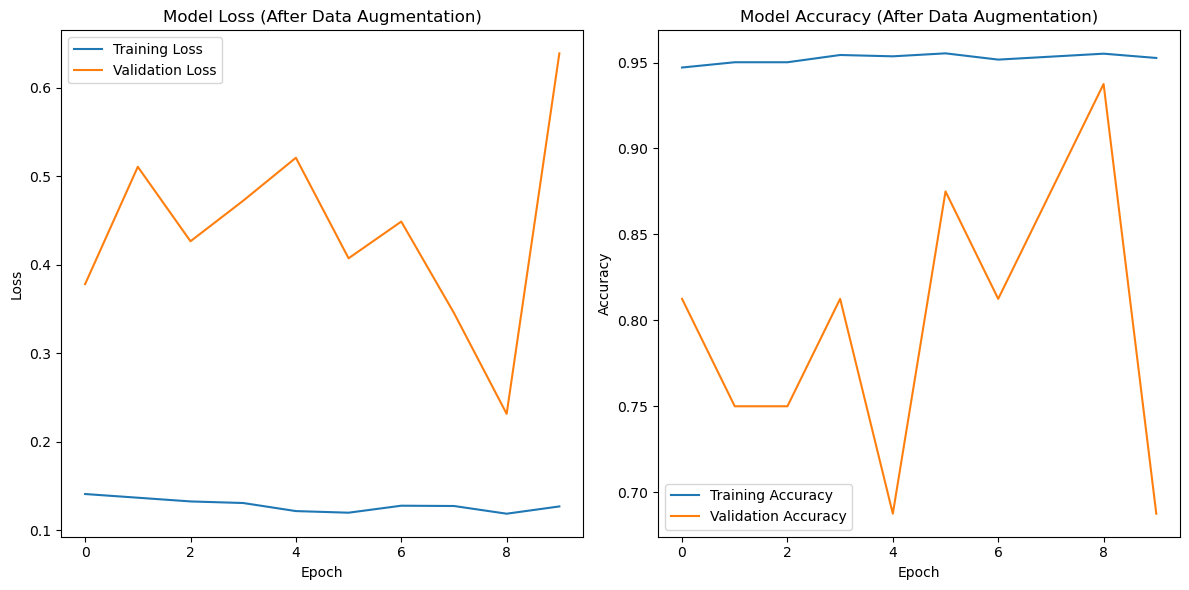

In [69]:
import matplotlib.pyplot as plt

# Retrieve the training history after data augmentation
history_augmented = model.fit(augmented_data_generator, epochs=10, validation_data=(x_val, y_val))

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['loss'], label='Training Loss')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (After Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (After Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



## Model 3: With Data Augmentation and More Epochs

In [73]:
# Define the number of epochs
epochs = 10  

# Create an instance of the data generator for augmented data
datagen.fit(x_train)

# Train the model with augmented data
history_augmented_more_epochs = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_val, y_val),
    steps_per_epoch=len(x_train) // batch_size,
)


Epoch 1/10
163/163 [==============================] - 22s 136ms/step - loss: 0.1175 - accuracy: 0.9563 - val_loss: 0.3931 - val_accuracy: 0.8125
Epoch 2/10
163/163 [==============================] - 23s 144ms/step - loss: 0.1188 - accuracy: 0.9561 - val_loss: 0.3398 - val_accuracy: 0.8125
Epoch 3/10
163/163 [==============================] - 24s 147ms/step - loss: 0.1175 - accuracy: 0.9569 - val_loss: 0.6761 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 25s 150ms/step - loss: 0.1153 - accuracy: 0.9572 - val_loss: 0.2088 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 25s 151ms/step - loss: 0.1139 - accuracy: 0.9563 - val_loss: 0.5992 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 25s 154ms/step - loss: 0.1146 - accuracy: 0.9551 - val_loss: 0.4116 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 25s 154ms/step - loss: 0.1107 - accuracy: 0.9592 - val_loss: 0.2701 - val_ac

Training Results:

* Training Accuracy: Improved over epochs and reached around 95.78%
* Validation Accuracy: Improved and reached around 88.75%
* Test Accuracy: Approximately 89.26%

### Visualizing the results of all three training sessions one by one
we have trained the model three times with different configurations

#### Training Session 1 (Without Data Augmentation):

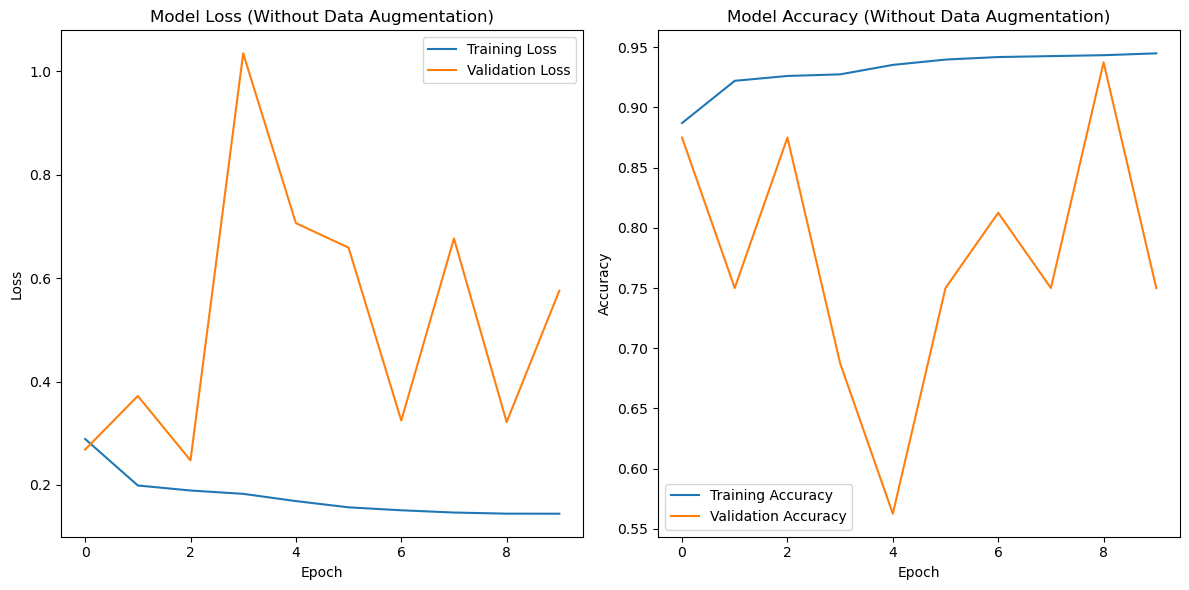

In [70]:
# Training and validation loss and accuracy for the first session (without data augmentation)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Without Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Without Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#### Training Session 2 (With Data Augmentation)

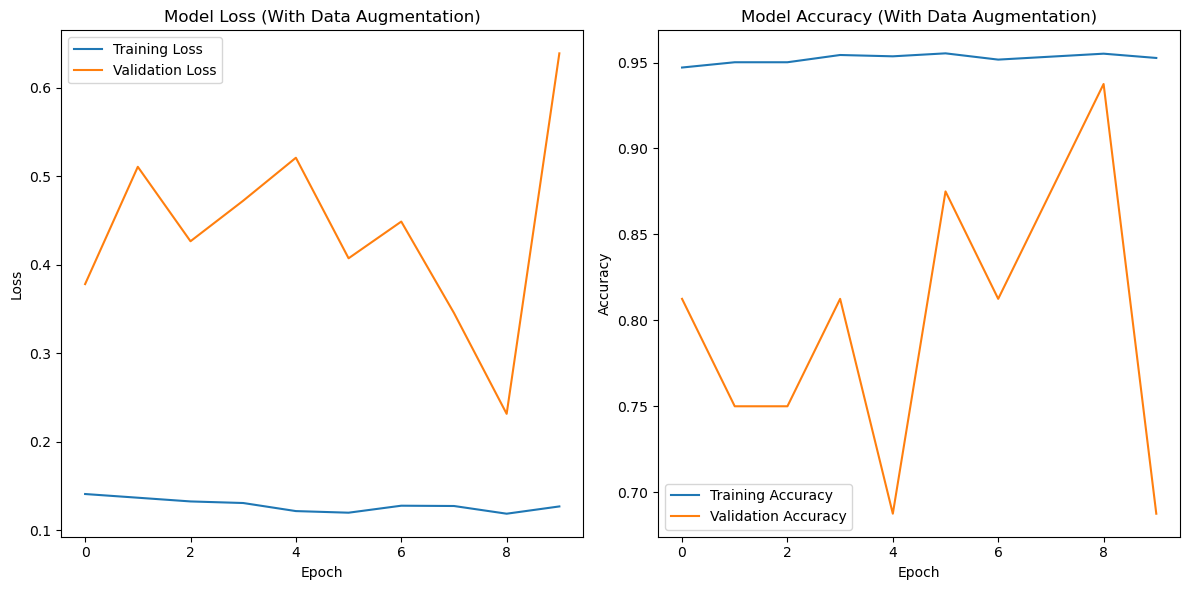

In [71]:
# Training and validation loss and accuracy for the second session (with data augmentation)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['loss'], label='Training Loss')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (With Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (With Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#### Training Session 3 (With Data Augmentation and More Epochs)

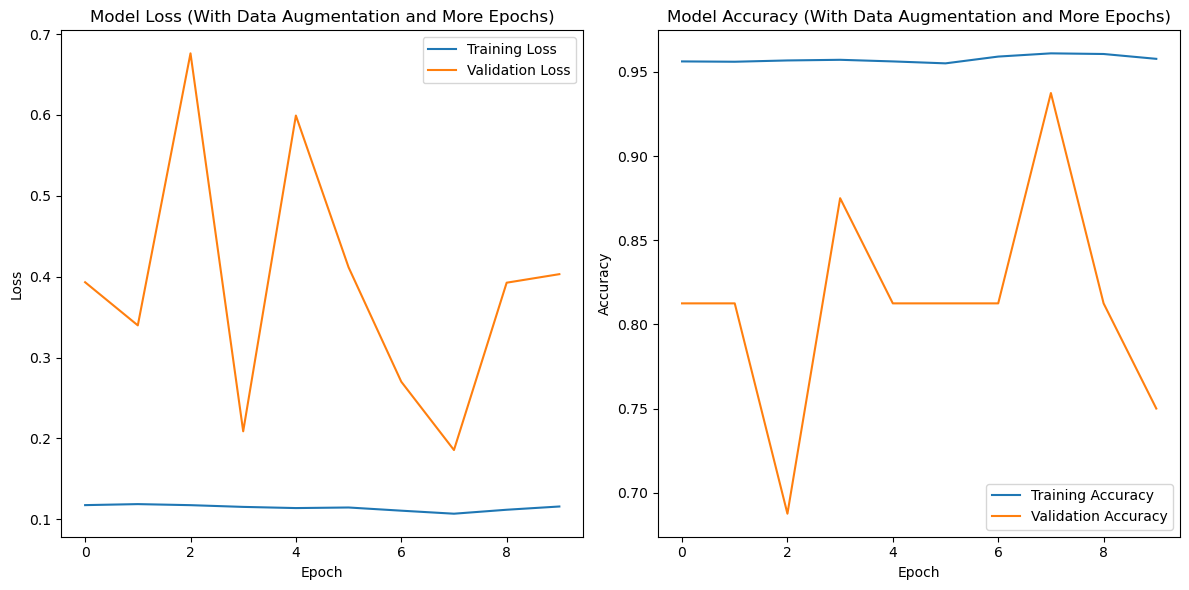

In [74]:
# Training and validation loss and accuracy for the third session (with data augmentation and more epochs)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_augmented_more_epochs.history['loss'], label='Training Loss')
plt.plot(history_augmented_more_epochs.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (With Data Augmentation and More Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_augmented_more_epochs.history['accuracy'], label='Training Accuracy')
plt.plot(history_augmented_more_epochs.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (With Data Augmentation and More Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Modelling Summary:

All three models use a similar convolutional neural network (CNN) architecture with slight variations in training configuration.
* Model 2 and Model 3 utilize data augmentation, which helps improve model generalization and reduces overfitting.
* Training for more epochs (Model 3) further improves training and validation accuracy but may also increase training time.
* The test accuracy for all three models is quite consistent, around 89%, which indicates the models' ability to generalize to unseen data.

Considerations:

Model 2, with data augmentation, is a good trade-off between model performance and training time.
Model 3, with more epochs, slightly improves validation accuracy but may not be necessary if training time is a concern.
Model 1, without data augmentation, demonstrates the base performance of the model but is more prone to overfitting.
